In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
train = pd.read_csv("D:/Tiger/Type/Dataset_Type.csv")
test = pd.read_csv("D:/Tiger/Type/Test_Type.csv")

In [3]:
print(train.shape)
print(test.shape)

(8651, 42)
(3096, 41)


In [4]:
train.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Time_since_most_recent_outstandi,PPI,prdt_desc
0,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,1,0,0,5,0,0,229,99,1,LIFE & CRITICAL ILLNESS
1,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,0,0,0,1,13,0,38,99,1,LASCI
2,8,913,A,120,33000.0,9.4,secured,59,11,18,...,0,0,0,1,1,0,525,99,1,LASU
3,9,840,B,60,8000.0,15.9,UnSecured,12,2,293,...,1,1,0,1,21,0,120,99,1,LASCI
4,11,901,A,60,12000.0,11.9,UnSecured,11,2,108,...,1,1,0,5,8,0,95,99,1,LASCI


In [5]:
train.isnull().sum()

Ref                                 0
Credit_Score                        0
Final_Grade                         0
Term                                0
Net_Advance                         0
APR                                 0
Loan_Type                           0
Mosaic                              0
Mosaic_Class                        0
Time_at_Address                     0
Residential_Status                  0
Number_of_Dependants                0
Marital_Status                      0
Gender                              0
Time_in_Employment                  0
Employment_Status                   0
Income_Range                        0
ACCESS_Card                         0
VISA_Card                           0
Other_Credit_Store_Card             0
Time_with_Bank                      0
Value_of_Property                   0
Outstanding_Mortgage_Bal            0
Total_Outstanding_Balances          0
Bureau_Data___Monthly_Other_Co_R    0
Worst_History_CT                    0
Age         

In [6]:
print(train.Age.min())
print(train.Age.max())

19
74


In [7]:
bins= [19,26,66,100]
labels = ['Young','Adult','SeniorCitizen']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

In [8]:
train1=train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [9]:
for col in ['AgeGroup']:
    train1[col]= train1[col].astype('object')
    test[col]= test[col].astype('object')

In [10]:
train1.dtypes

Ref                                   int64
Credit_Score                          int64
Final_Grade                          object
Term                                  int64
Net_Advance                         float64
APR                                 float64
Loan_Type                            object
Mosaic                                int64
Mosaic_Class                          int64
Time_at_Address                       int64
Residential_Status                   object
Number_of_Dependants                  int64
Marital_Status                       object
Gender                               object
Time_in_Employment                    int64
Employment_Status                    object
Income_Range                          int64
ACCESS_Card                          object
VISA_Card                            object
Other_Credit_Store_Card              object
Time_with_Bank                        int64
Value_of_Property                     int64
Outstanding_Mortgage_Bal        

In [11]:
indexNames= train1[train1['PPI']==0].index
train1.drop(indexNames, inplace= True)

# Exploratory Data Analysis and Data Pre Processing

In [12]:
# list of numerical variables
numerical_features = [feature for feature in train1.columns if train1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  31


In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train1[feature].unique())<25 and feature not in ['Ref']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 11


In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Ref']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


In [15]:
categorical_features=[feature for feature in train1.columns if train1[feature].dtypes=='O'and feature not in ['Ref']]

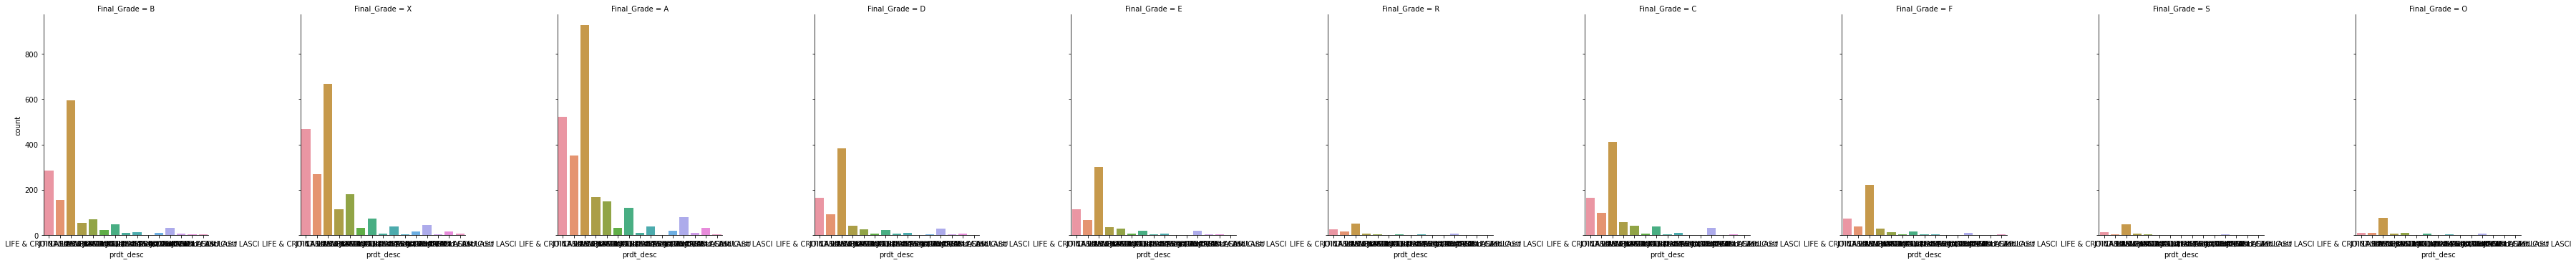

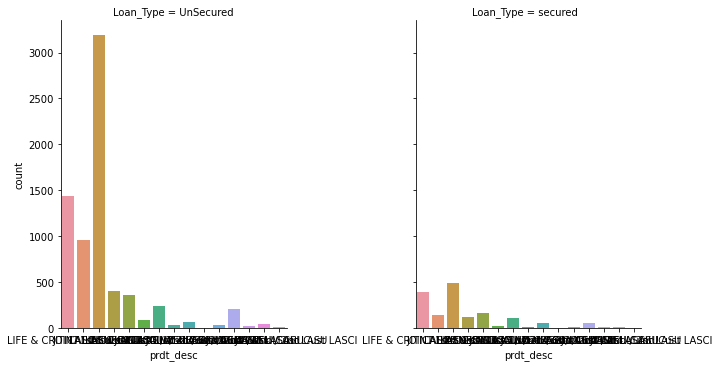

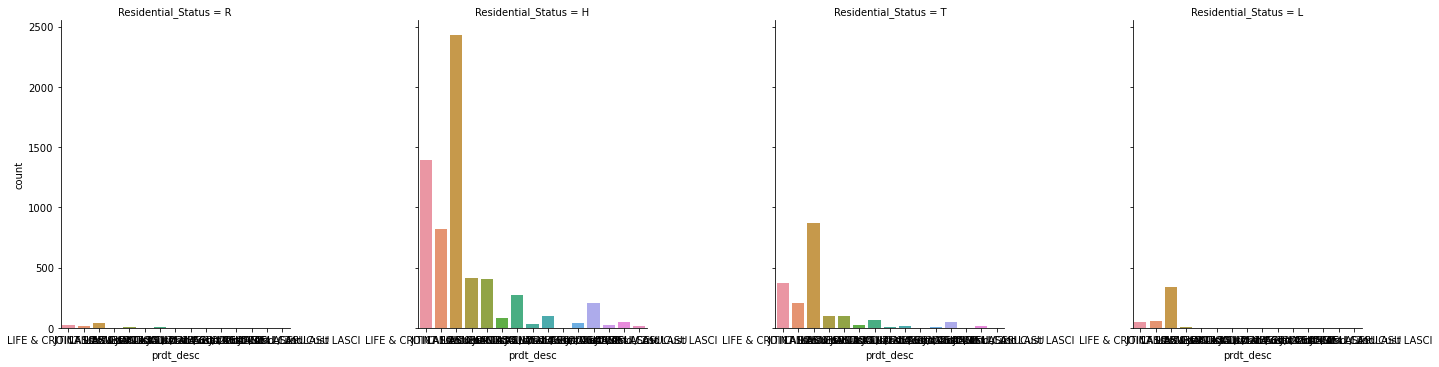

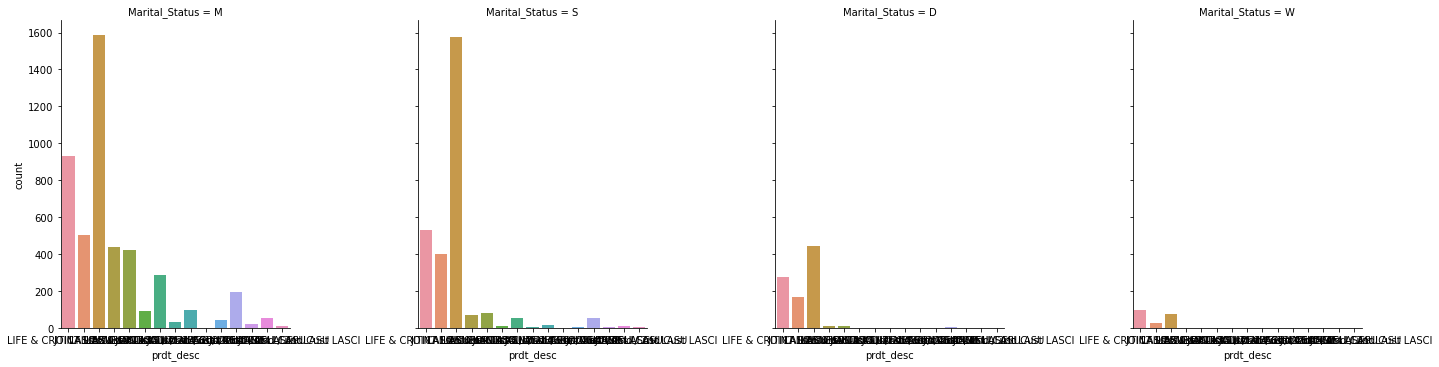

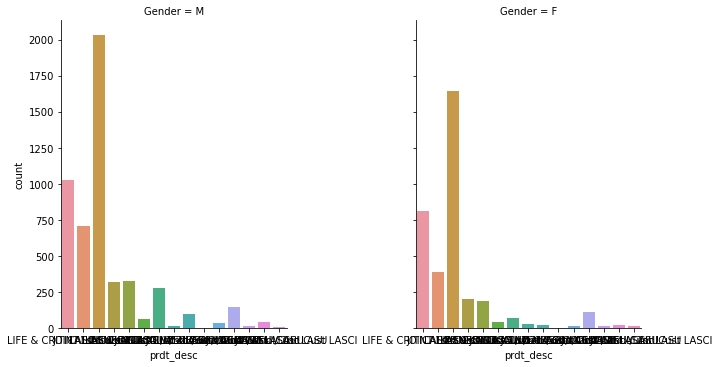

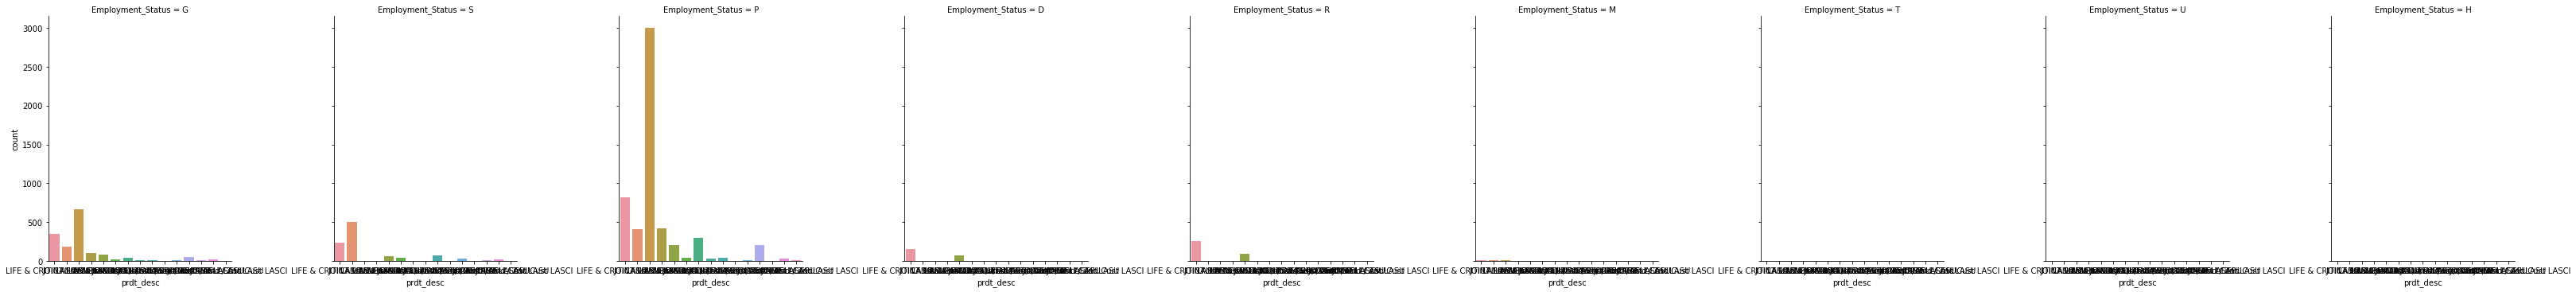

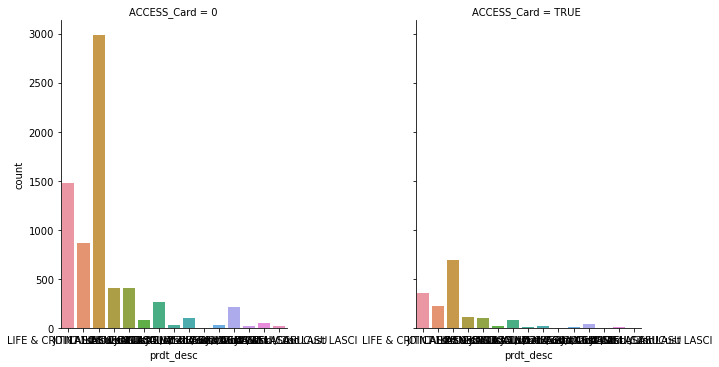

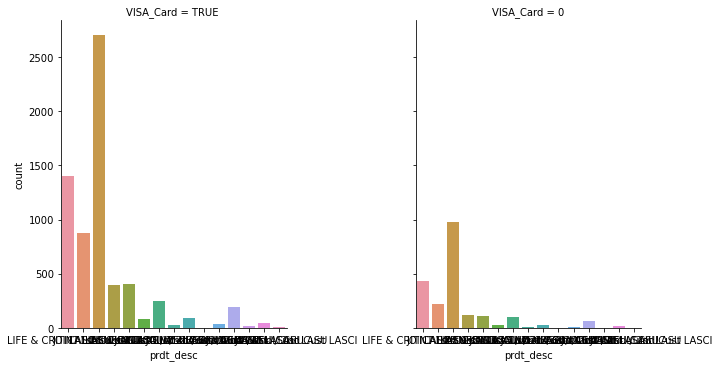

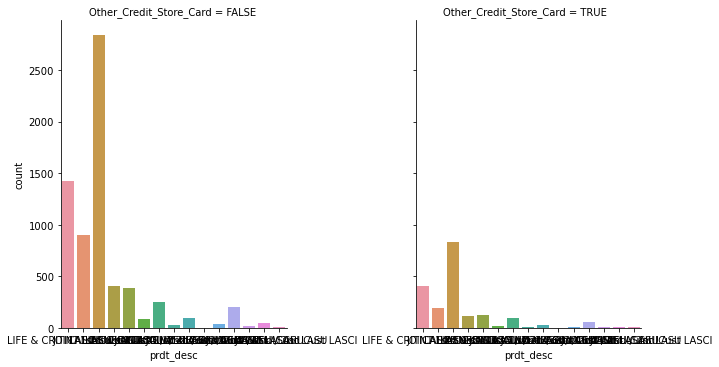

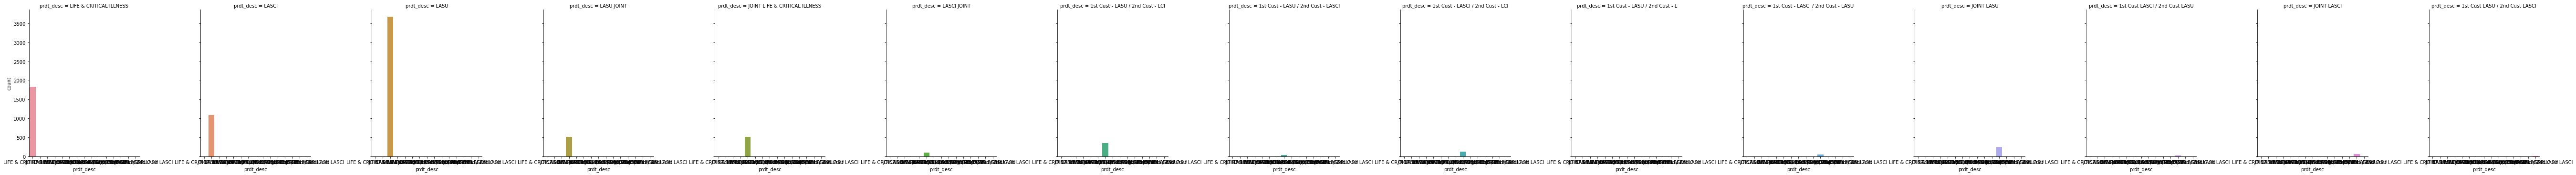

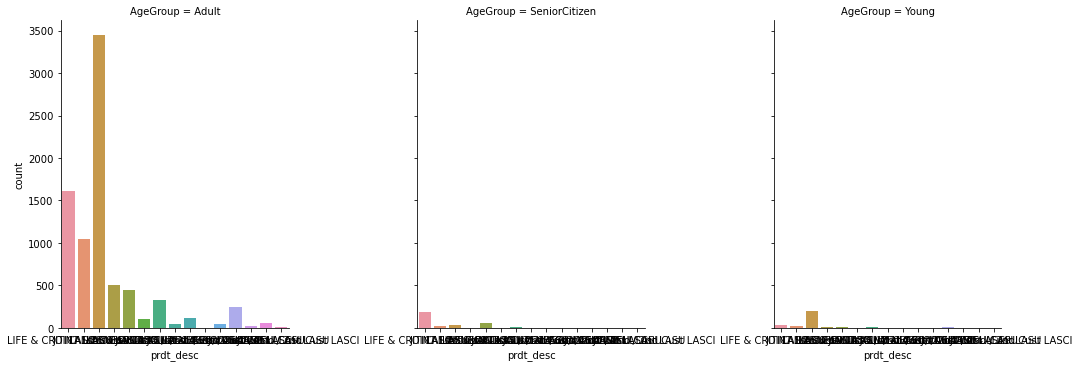

In [16]:
for categorical_feature in categorical_features:
    sns.catplot(x='prdt_desc', col=categorical_feature, kind='count', data= train1)
plt.show()

In [17]:
len(train1.index)

8651

<AxesSubplot:xlabel='prdt_desc', ylabel='count'>

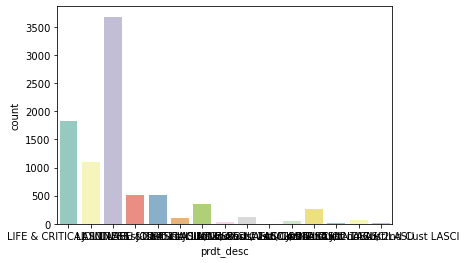

In [18]:
sns.countplot(x = 'prdt_desc', data = train1, palette = 'Set3')

In [19]:
new_train = pd.get_dummies(train1,columns = ['Final_Grade','Loan_Type','Residential_Status','Marital_Status','Gender','Employment_Status','ACCESS_Card','VISA_Card','Other_Credit_Store_Card','AgeGroup'], drop_first = True)
new_train.head()

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,...,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_T,Employment_Status_U,ACCESS_Card_TRUE,VISA_Card_TRUE,Other_Credit_Store_Card_TRUE,AgeGroup_SeniorCitizen,AgeGroup_Young
0,6,839,60,8000.0,16.9,47,8,48,0,82,...,0,0,0,0,0,0,1,0,0,0
1,7,1057,60,7650.0,7.4,55,10,156,2,342,...,0,0,1,0,0,1,0,0,0,0
2,8,913,120,33000.0,9.4,59,11,18,0,170,...,1,0,0,0,0,0,1,0,0,0
3,9,840,60,8000.0,15.9,12,2,293,0,77,...,1,0,0,0,0,1,1,0,0,0
4,11,901,60,12000.0,11.9,11,2,108,1,24,...,1,0,0,0,0,1,1,0,0,0


In [20]:
train2=new_train.drop(['Ref','PPI'],axis=1)

In [21]:
train2.dtypes

Credit_Score                          int64
Term                                  int64
Net_Advance                         float64
APR                                 float64
Mosaic                                int64
Mosaic_Class                          int64
Time_at_Address                       int64
Number_of_Dependants                  int64
Time_in_Employment                    int64
Income_Range                          int64
Time_with_Bank                        int64
Value_of_Property                     int64
Outstanding_Mortgage_Bal              int64
Total_Outstanding_Balances            int64
Bureau_Data___Monthly_Other_Co_R      int64
Worst_History_CT                      int64
Total_outstanding_balance__mortg      int64
Total___Public_Info___CCJ____ban      int64
Total_value__Public_Info___CCJ__      int64
Time_since_most_recent_Public_In      int64
Total_value__CAIS_8_9s                int64
Worst_status_L6m                      int64
Worst_CUrrent_Status            

# Model Building

In [22]:
X = train2.drop('prdt_desc', axis = 1)
y = train2['prdt_desc']

Feature Importance

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=45)
fit = bestfeatures.fit(X,y)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Credit_Score,1.876594e+03
1,Term,4.120526e+03
2,Net_Advance,2.505266e+06
3,APR,1.427486e+03
4,Mosaic,2.285240e+02
5,Mosaic_Class,6.399853e+01
6,Time_at_Address,4.920506e+03
7,Number_of_Dependants,1.679435e+02
8,Time_in_Employment,1.796898e+04
9,Income_Range,2.547884e+02


In [25]:
Z=featureScores.nlargest(10,'Score')
Z

,Specs,Score
13,Total_Outstanding_Balances,1.530706e+07
12,Outstanding_Mortgage_Bal,1.308753e+07
11,Value_of_Property,8.613949e+06
2,Net_Advance,2.505266e+06
14,Bureau_Data___Monthly_Other_Co_R,1.280963e+05
27,Total_outstanding_balance___excl,3.879021e+04
20,Total_value__CAIS_8_9s,1.937894e+04
8,Time_in_Employment,1.796898e+04
16,Total_outstanding_balance__mortg,1.283748e+04
10,Time_with_Bank,7.436030e+03


In [26]:
X1=X[Z['Specs']]

In [27]:
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X1, y)
print("The Training Accuracy is: ", xgb_cl.score(X1, y))
y_pred = xgb_cl.predict(X1)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[03:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Training Accuracy is:  0.8632528031441452
[[  47    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  116    0    0    0    0    0    0    0    0    0    0    3    0
     0]
 [   0    0    2    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0   40    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0  283    0    0    0    0    0    0    0   61    0
     1]
 [   0    0    0    0    0   23    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0   15    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0   61    0    0    0    0    0    0
     0]
 [ 

# Model run on Test set

In [28]:
test1= pd.get_dummies(test,columns = ['Final_Grade','Loan_Type','Residential_Status','Marital_Status','Gender','Employment_Status','ACCESS_Card','VISA_Card','Other_Credit_Store_Card','AgeGroup'], drop_first = True)
test1.head()

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,...,Employment_Status_M,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_U,ACCESS_Card_TRUE,VISA_Card_TRUE,Other_Credit_Store_Card_TRUE,AgeGroup_SeniorCitizen,AgeGroup_Young
0,1,918,36,3000.0,14.4,46,8,132,0,288,...,0,0,0,1,0,0,0,1,0,0
1,44,966,48,8000.0,7.9,24,4,156,3,81,...,0,1,0,0,0,1,0,0,0,0
2,56,829,60,4000.0,26.9,42,7,96,0,110,...,0,0,0,0,0,0,0,0,0,0
3,88,903,120,24000.0,10.9,11,2,123,1,172,...,0,0,0,0,0,0,1,0,0,0
4,91,747,120,10000.0,19.9,43,7,1,3,168,...,0,1,0,0,0,1,1,1,0,0


In [29]:
feature_scale=[feature for feature in test1.columns if feature not in ['Ref','prdt_desc']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test1[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.transform(test1[feature_scale])

data1 = pd.concat([test[['Ref']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(test1[feature_scale]), columns=feature_scale)],
                    axis=1)

In [30]:
x=data1[Z['Specs']]
classification= xgb.XGBClassifier(solver= 'lbfgs', penalty='l2', C= 100)
warnings.filterwarnings("ignore")
classification.fit(X1, y)
print("The Training Accuracy is: ", classification.score(X1, y))
y_pred4 = classification.predict(X1)
print(confusion_matrix(y, y_pred4))
print(classification_report(y, y_pred4))

[03:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "C", "penalty", "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Training Accuracy is:  0.8632528031441452
[[  47    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0  116    0    0    0    0    0    0    0    0    0    0    3    0
     0]
 [   0    0    2    0    0    0    0    0    0    0 

In [31]:
y_prediction=classification.predict(X1)

In [32]:
y_pred= pd.DataFrame(y_prediction)

In [33]:
print(y_pred)

                            0
0     LIFE & CRITICAL ILLNESS
1                       LASCI
2                        LASU
3                        LASU
4                       LASCI
...                       ...
8646                     LASU
8647                     LASU
8648                     LASU
8649                     LASU
8650                     LASU

[8651 rows x 1 columns]


In [34]:
df=pd.DataFrame(test)
rslt=pd.merge(df,y_pred,how = 'left',left_index = True, right_index = True)

In [35]:
rslt.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Time_since_most_recent_outstandi,PPI,AgeGroup,0
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,0,0,9,10,1,18,16,1,Adult,LIFE & CRITICAL ILLNESS
1,44,966,X,48,8000.0,7.9,UnSecured,24,4,156,...,0,0,0,13,0,13,99,1,Adult,LASCI
2,56,829,C,60,4000.0,26.9,UnSecured,42,7,96,...,0,0,1,8,0,85,99,1,Adult,LASU
3,88,903,A,120,24000.0,10.9,secured,11,2,123,...,4,2,4,0,0,204,99,1,Adult,LASU
4,91,747,F,120,10000.0,19.9,secured,43,7,1,...,0,0,5,0,0,72,99,1,Adult,LASCI


In [36]:
rslt.to_csv('D:/Tiger/Important(Most)2.csv',index=False)